In [1]:
import numpy as np
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2 as ps

In [2]:
conn = ps.connect(dbname="Northwind",
                  user="postgres",
                  password="123",
                  port = "5432")

#  MÜŞTERİ ANALİZİ

In [3]:
sql = """SELECT country, COUNT(*) AS customer_count 
	FROM customers 
		GROUP BY country 
		ORDER BY 2 DESC"""

In [4]:
df = sqlio.read_sql_query(sql,conn)
df.head()

C:\Users\ozgeu\AppData\Local\Temp\ipykernel_37280\1600180838.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = sqlio.read_sql_query(sql,conn)


,country,customer_count
0,USA,13
1,Germany,11
2,France,11
3,Brazil,9
4,UK,7


In [5]:
df.shape

(21, 2)

In [6]:
import matplotlib.pyplot as plt


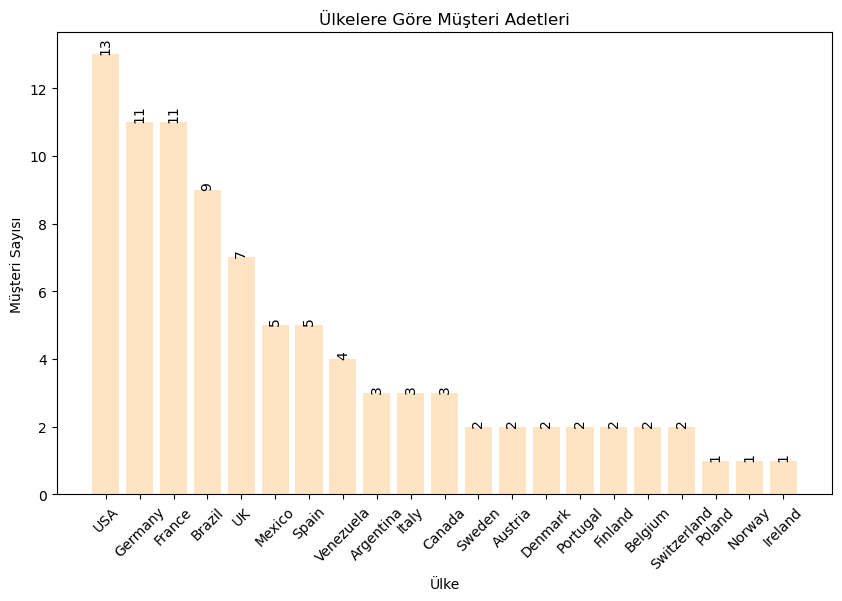

In [7]:
plt.figure(figsize=(10, 6))
bars = plt.bar(df['country'], df['customer_count'], color='bisque')
plt.xlabel('Ülke')
plt.ylabel('Müşteri Sayısı')
plt.title('Ülkelere Göre Müşteri Adetleri')
plt.xticks(rotation=45)


for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())), 
             ha='center', va='bottom', fontsize=10, rotation=90)

plt.show()

In [8]:
sql2 = """
SELECT 
	c.customer_id, 
	c.company_name, 
	c.contact_name, 
	c.contact_title, 
	o.order_id, 
	o.employee_id, 
	o.order_date, 
	o.shipped_date, 
	o.ship_country,
	COALESCE(COUNT(o.order_id) OVER (PARTITION BY c.customer_id), 0) AS order_count
FROM customers c
LEFT JOIN orders o ON c.customer_id = o.customer_id
	ORDER BY 10 DESC
	LIMIT 200
"""

In [9]:
df2 = sqlio.read_sql_query(sql2,conn)
df2.head()

C:\Users\ozgeu\AppData\Local\Temp\ipykernel_37280\229322232.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = sqlio.read_sql_query(sql2,conn)


,customer_id,company_name,contact_name,contact_title,order_id,employee_id,order_date,shipped_date,ship_country,order_count
0,SAVEA,Save-a-lot Markets,Jose Pavarotti,Sales Representative,10941,7,1998-03-11,1998-03-20,USA,31
1,SAVEA,Save-a-lot Markets,Jose Pavarotti,Sales Representative,10603,8,1997-07-18,1997-08-08,USA,31
2,SAVEA,Save-a-lot Markets,Jose Pavarotti,Sales Representative,10983,2,1998-03-27,1998-04-06,USA,31
3,SAVEA,Save-a-lot Markets,Jose Pavarotti,Sales Representative,10815,2,1998-01-05,1998-01-14,USA,31
4,SAVEA,Save-a-lot Markets,Jose Pavarotti,Sales Representative,10607,5,1997-07-22,1997-07-25,USA,31


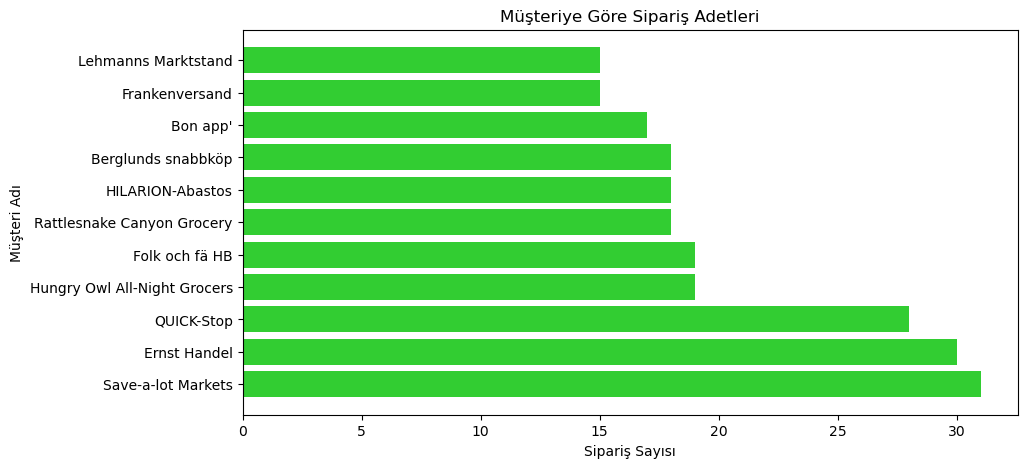

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.barh(df2['company_name'], df2['order_count'], color='limegreen')
plt.xlabel('Sipariş Sayısı')
plt.ylabel('Müşteri Adı')
plt.title('Müşteriye Göre Sipariş Adetleri')
plt.show()


# SİPARİŞ ANALİZİ

In [11]:
sql3 = """

	SELECT
    od.product_id,
    p.product_name,
    AVG(od.discount) AS avg_discount,
    SUM(od.quantity) AS total_quantity_sold,
    SUM(od.unit_price * od.quantity * (1 - od.discount)) AS total_income
FROM order_details od
JOIN products p ON od.product_id = p.product_id
GROUP BY od.product_id, p.product_name
HAVING AVG(od.discount) IS NOT NULL
ORDER BY 5 DESC
LIMIT 10

    """

In [12]:
df3 = sqlio.read_sql_query(sql3,conn)
df3.head()

C:\Users\ozgeu\AppData\Local\Temp\ipykernel_37280\958191848.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df3 = sqlio.read_sql_query(sql3,conn)


,product_id,product_name,avg_discount,total_quantity_sold,total_income
0,38,Côte de Blaye,0.045833,623,141396.735627
1,29,Thüringer Rostbratwurst,0.064063,746,80368.672439
2,59,Raclette Courdavault,0.047222,1496,71155.699909
3,62,Tarte au sucre,0.054167,1083,47234.969979
4,60,Camembert Pierrot,0.063922,1577,46825.480295


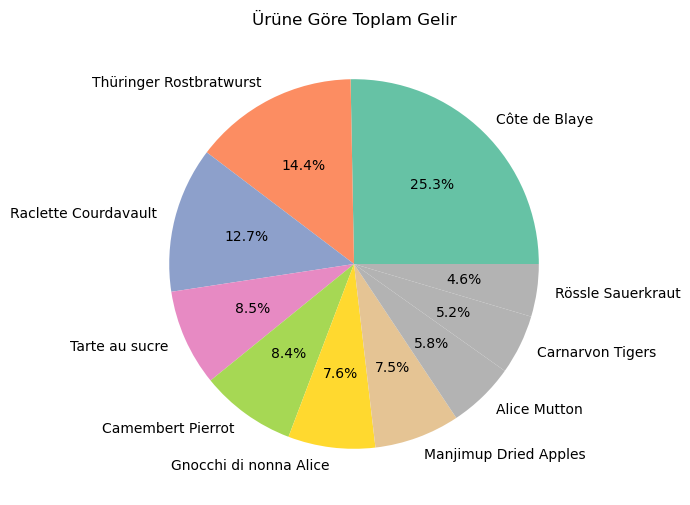

In [13]:

product_names = df3['product_name']
total_incomes = df3['total_income']

plt.figure(figsize=(10, 6))
plt.pie(total_incomes, labels=product_names, autopct='%1.1f%%', colors=plt.cm.Set2(range(len(product_names)))
)

plt.title('Ürüne Göre Toplam Gelir')

plt.show()

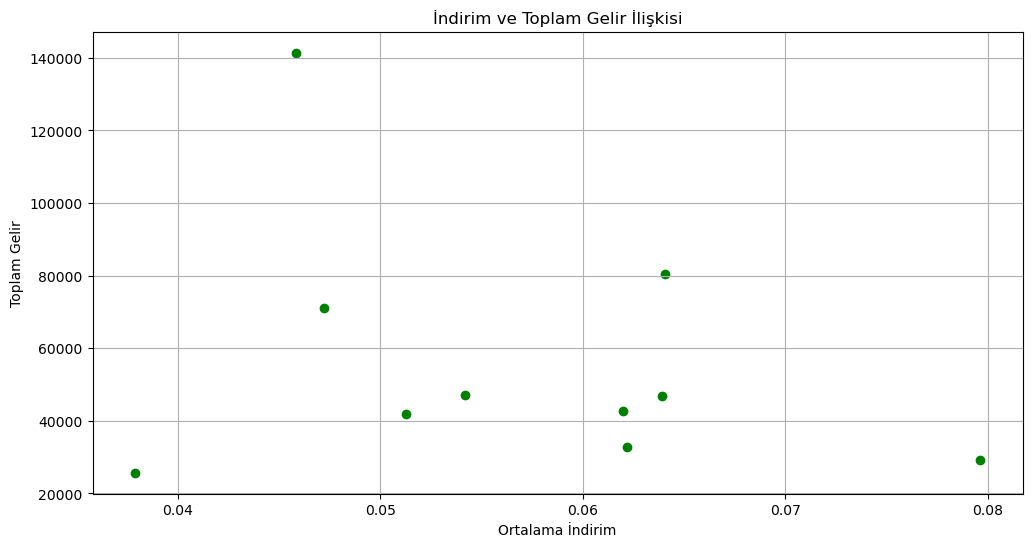

In [14]:
# İndirim ve toplam satışları içeren bir scatter plot oluşturalım. 
# İndirim oranı ile toplam satış ve gelir arasındaki ilişkiyi inceleyelim.
plt.figure(figsize=(12, 6))
plt.scatter(df3['avg_discount'], df3['total_income'], color='green')
plt.xlabel('Ortalama İndirim')
plt.ylabel('Toplam Gelir')
plt.title('İndirim ve Toplam Gelir İlişkisi')
plt.grid(True)
plt.show()



In [15]:
sql4 = """ SELECT 
    TO_CHAR(o.order_date, 'Day') AS day_of_week,
    COUNT(o.order_id) AS order_count
		FROM orders o
			GROUP BY TO_CHAR(o.order_date, 'Day')
			ORDER BY order_count DESC
"""

In [16]:
df4 = sqlio.read_sql_query(sql4,conn)
df4.head()

C:\Users\ozgeu\AppData\Local\Temp\ipykernel_37280\1053938286.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df4 = sqlio.read_sql_query(sql4,conn)


,day_of_week,order_count
0,Thursday,168
1,Tuesday,168
2,Wednesday,165
3,Monday,165
4,Friday,164


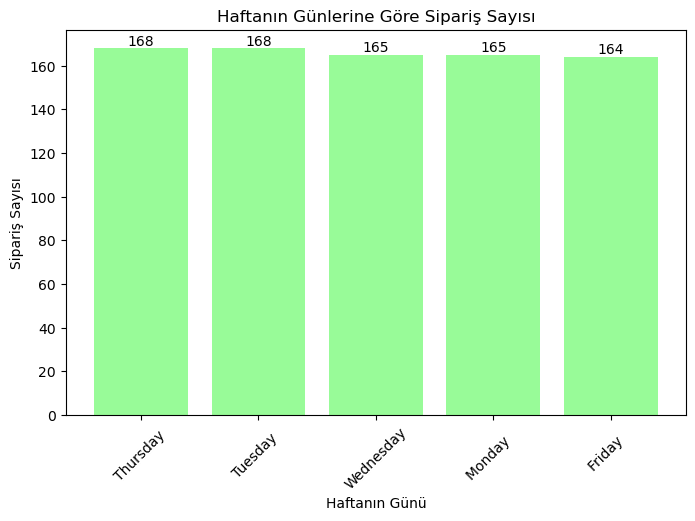

In [17]:
plt.figure(figsize=(8, 5))
bars = plt.bar(df4['day_of_week'], df4['order_count'], color='palegreen')
plt.xlabel('Haftanın Günü')
plt.ylabel('Sipariş Sayısı')
plt.title('Haftanın Günlerine Göre Sipariş Sayısı')
plt.xticks(rotation=45)

# Her bir barın üzerine sayıları yazdırma
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())), 
             ha='center', va='bottom', fontsize=10)

plt.show()

In [18]:
sql5 = """ 
SELECT 'TOTAL', COUNT(*) as order_count, ship_country
	FROM orders
		GROUP BY ship_country
			ORDER BY 2 DESC
            """

In [19]:
df5 = sqlio.read_sql_query(sql5,conn)
df5.head()

C:\Users\ozgeu\AppData\Local\Temp\ipykernel_37280\3473480067.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df5 = sqlio.read_sql_query(sql5,conn)


,?column?,order_count,ship_country
0,TOTAL,122,Germany
1,TOTAL,122,USA
2,TOTAL,83,Brazil
3,TOTAL,77,France
4,TOTAL,56,UK


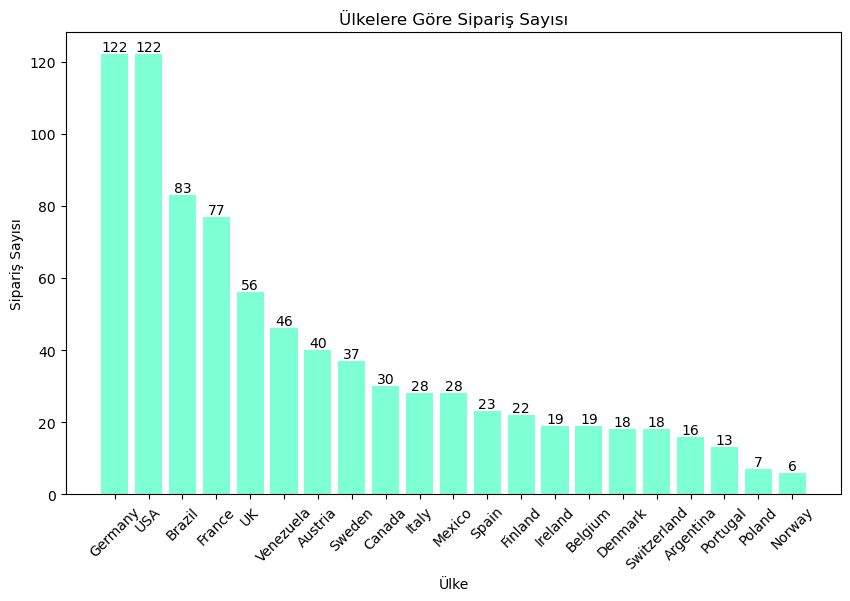

In [20]:
plt.figure(figsize=(10, 6))
bars = plt.bar(df5['ship_country'], df5['order_count'], color='aquamarine')
plt.xlabel('Ülke')
plt.ylabel('Sipariş Sayısı')
plt.title('Ülkelere Göre Sipariş Sayısı')
plt.xticks(rotation=45)

# Barların üzerine değerleri ekleme
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())), 
             ha='center', va='bottom', fontsize=10)

plt.show()